# 関数 save_fig：図の保存

In [1]:
!pip install japanize-matplotlib

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import japanize_matplotlib

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0.2)

import sys
from datetime import datetime

def dmcode():
    t = datetime.now().timestamp()
    buff = ['***DMCODE', str(t)]
    print(' '.join(buff))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=861fb553ab43224a84c4851a64c43cd8150f714096f3982c0440d2501a7f6aca
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 plot_data2d：2次元データをプロットする

In [2]:
def plot_data2d(x_train, y_train, x_test, y_test, file_prefix=''):
    """2次元データをプロットする
    Args:
        x_train (ndarray): 訓練データの点数。x[i, 0]: 数学の点数。x[i, 1]: 英語の点数
        y_train (ndarray): 訓練データのクラス
        x_test (ndarray): テストデータの点数。x[i, 0]: 数学の点数。x[i, 1]: 英語の点数
        y_test (ndarray): テストデータのクラス
        file_prefix (str): グラフの保存先パス
    """
    colors=['coral', 'cornflowerblue']
    # 訓練データのマーカー。クラス0とクラス1
    markers=['o', 'o']

    plt.figure(figsize=(12, 6))

    def plot(x, y, title):
        # データのプロット
        for i in range(2):
            plt.scatter(x[y == i, 0], x[y == i, 1], c=colors[i],
                        marker=markers[i], edgecolor='black', s=100, label=f'クラス{i}')

        plt.title(title, fontsize=16)
        plt.grid()
        plt.legend(fontsize=14)

    plt.subplot(1, 2, 1)
    plot(x_train, y_train, '訓練データ')

    plt.subplot(1, 2, 2)
    plot(x_test, y_test, 'テストデータ')

    plt.tight_layout()
    save_fig(plt, file_prefix)
    plt.show()

# 関数 plot_decision_regions：決定領域の可視化

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(x_train, y_train, x_test, y_test, classifier,
                          new_scores=None, new_names=None, new_classes=None,
                          resolution=0.01,
                          file_prefix=''):
    """2次元データと決定境界を描画する。
    Args:
        x_train (ndarray): 訓練データの点数。x[i, 0]: 数学の点数。x[i, 1]: 英語の点数
        y_train (ndarray): 訓練データのクラス
        x_test (ndarray): テストデータの点数。x[i, 0]: 数学の点数。x[i, 1]: 英語の点数
        y_test (ndarray): テストデータのクラス
        classifier: 分類器
        file_prefix (str): グラフの保存先パス
    """
    markers = ('o', 'o', 'o', '^', 'v', '+', '*')
    colors = ('coral', 'cornflowerblue', 'lightgreen', 'gray', 'cyan', 'blue', 'orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    X = np.concatenate([x_train, x_test])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.figure(figsize=(12, 6))

    cls = np.unique(np.concatenate([y_train, y_test]))

    def plot(x, y, title):
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)


        for idx, cl in enumerate(np.sort(cls)):
            plt.scatter(x[y == cl, 0],
                        x[y == cl, 1],
                        alpha=0.6,
                        marker=markers[idx],
                        c=colors[cl],
                        label=f'クラス{cl}',
                        s=100,
                        edgecolor='black')

        if new_scores is not None:
            for idx in range(len(new_scores)):
                plt.scatter(new_scores[idx, 0], new_scores[idx, 1],
                            marker=markers[new_classes[idx]],
                            c=colors[new_classes[idx]],
                            s=300,
                            label=new_names[idx],
                            edgecolor='black')


        plt.legend(fontsize=14)
        plt.title(title, fontsize=16)

    plt.subplot(1, 2, 1)
    plot(x_train, y_train, '訓練データ')
    plt.subplot(1, 2, 2)
    plot(x_test, y_test, 'テストデータ')
    plt.tight_layout()

    save_fig(plt, file_prefix=file_prefix)
    plt.show()

# 関数 scoreとevaluate：分類性能の評価

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

def calc_score(y_true, y_pred, class_labels, name, func):
    """ある指標の値をクラスごとに計算する。
    Args:
        y_true (ndarray): 目的変数（正解）
        y_pred (ndarray): 予測値
        class_labels (list): クラスラベル（文字列）を格納したリスト
        name (str): 指標の名前
        func (sklearn.metrics): 指標を計算する関数
    """
    # 指標の計算。average=None クラスごとに値を計算する
    score = func(y_true, y_pred, average=None)

    # 書式整形してクラスごとの値を表示する
    score_str = []
    for i in range(y_true.max() + 1):
        score_str.append(f'{score[i]:.2f}')

    print('\n' + name)
    print(' '.join(class_labels))
    print(' '.join(score_str))

def evaluate(y_true, y_pred, file_prefix=''): # file_prefix to be removed
    """分類性能の評価用関数。混同行列・正解率・精度・再現率・F1値を計算し、表示する。
    Args:
        y_true (ndarray): 目的変数（正解）
        y_pred (ndarray): 予測値
    """

    # 混同行列の計算
    cm = confusion_matrix(y_true, y_pred)

    # 正解率の計算
    accuracy = accuracy_score(y_true, y_pred)
    print('正解率')
    print(f'{accuracy}')

    # 精度と再現率の表示用にクラスラベルを生成
    class_labels = []
    for i in range(y_true.max() + 1):
        class_labels.append(f'{i:4d}') # 空白を含め最低4桁で表示

    # 精度の計算。average=None クラスごとに精度を計算する
    calc_score(y_true, y_pred, class_labels, '精度', precision_score)

    # 再現率の計算。average=None クラスごとに再現率を計算する
    calc_score(y_true, y_pred, class_labels, '再現率', recall_score)

    # F1値の計算。
    calc_score(y_true, y_pred, class_labels, 'F1値', f1_score)

    # 混同行列を可視化する
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm, annot=True, fmt='3d', square=True, cmap='hot', annot_kws = {'size':14})
    plt.xlabel('予測', fontsize=14)
    plt.ylabel('正解', fontsize=14)
    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix) # to be removed
    plt.show()

 # 実習9.1：ワインデータセットの読み込み

In [5]:
import pandas as pd
# データフレームにdm9-1.csvの内容を読み込む
df = pd.read_csv('dm9-1.csv')
# データフレームの中身を表示
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# 実習9.2：ワインデータセットの前処理

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess(df, train_size, target_name):
    """データセットの前処理を行う。
    Args:
        df (pd.DataFrame): 教師データを格納したデータフレーム
        train_size (float): 教師データから抽出する訓練データの割合
        target_name (str): 目的変数の名前
    returns:
        x_train (ndarray): 訓練データの説明変数
        x_test (ndarray): テストデータの説明変数
        y_train (ndarray): 訓練データの目的変数
        y_test (ndarray): テストデータの目的変数
    """
    # データフレームの列は説明変数と目的変数を含んでいる。
    # 説明変数の列名として、目的変数(target)以外の列名を取得する。
    feature_names=list(df.columns)
    feature_names.remove(target_name)
    print('説明変数の個数:', len(feature_names))
    x=df[feature_names].to_numpy() # 説明変数
    y=df[target_name].to_numpy() # 目的変数
    num_classes=y.max()+1
    print('クラス数:', num_classes)

    # 訓練データとテストデータに分割
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=train_size,
                                                        shuffle=True,random_state=0)
    print('訓練データ数',len(x_train))
    print('テストデータ数',len(x_test))

    # 標準化
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    # 訓練データで決めた平均と標準偏差を使い、テストデータを標準化
    x_test=scaler.transform(x_test)
    return  x_train, x_test, y_train, y_test

# 関数の外
x_train, x_test, y_train, y_test = preprocess(df,train_size=0.5,target_name='target')

説明変数の個数: 13
クラス数: 3
訓練データ数 89
テストデータ数 89


# 実習9.3：ワインデータセットに対する多クラス分類（線形）

訓練データ
正解率
1.0

精度
   0    1    2
1.00 1.00 1.00

再現率
   0    1    2
1.00 1.00 1.00

F1値
   0    1    2
1.00 1.00 1.00


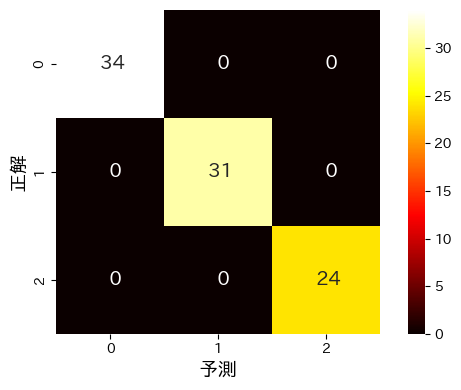

テストデータ
正解率
0.9325842696629213

精度
   0    1    2
0.89 0.97 0.92

再現率
   0    1    2
1.00 0.88 0.96

F1値
   0    1    2
0.94 0.92 0.94


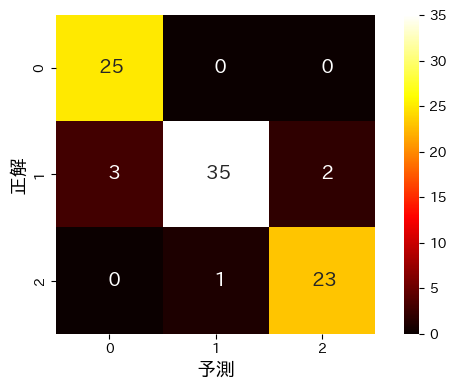

In [12]:
from sklearn.svm import SVC

# 線形サポートベクトルマシン
model=SVC(kernel='linear',C=1)

# 訓練データで学習
model.fit(x_train,y_train)

# 訓練データに対する予測
y_train_pred=model.predict(x_train)

print('訓練データ')
# 訓練データに対して、混同行列・正解率・精度・再現率・F1値を計算
evaluate(y_train, y_train_pred)

# テストデータに対する予測
y_test_pred=model.predict(x_test)
print('テストデータ')
# テストデータに対して、混同行列・正解率・精度・再現率・F1値を計算
evaluate(y_test, y_test_pred)

# 実習9.4：カーネルSVMによる2クラス分類 双月分布 小さな$\gamma$値

訓練データ数 100
テストデータ数 100


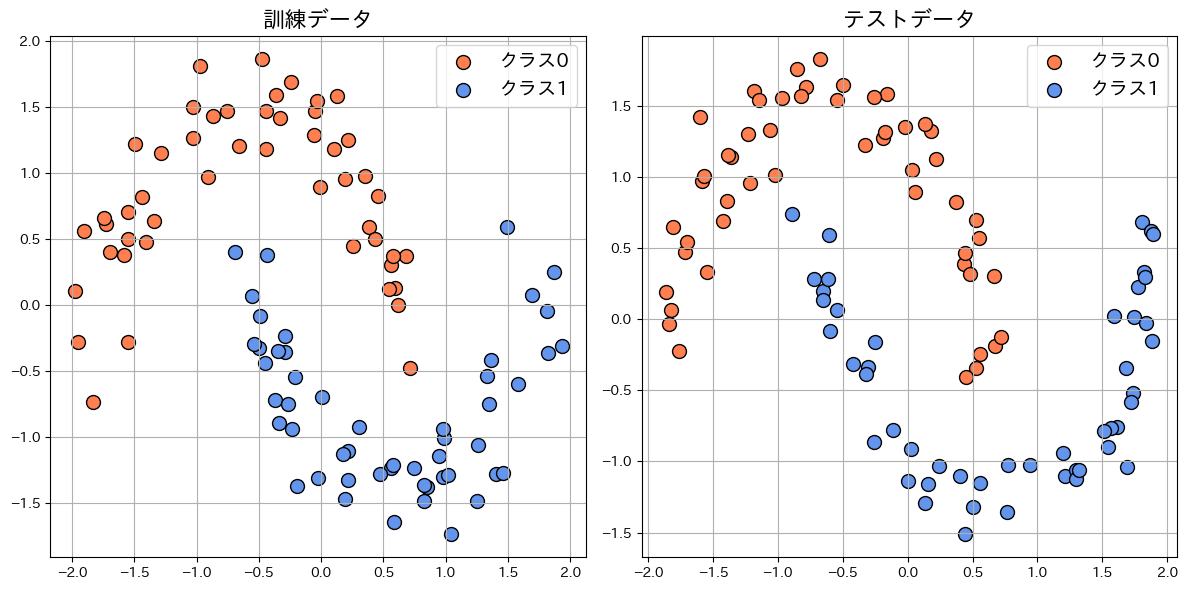

訓練データ
正解率
0.92

精度
   0    1
0.92 0.92

再現率
   0    1
0.92 0.92

F1値
   0    1
0.92 0.92


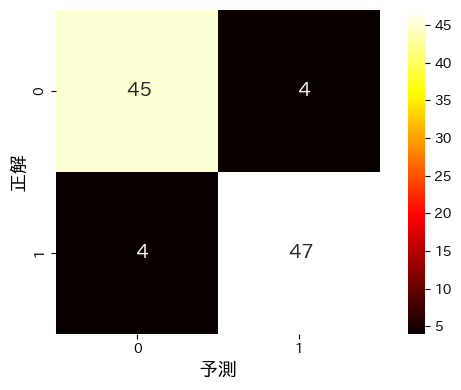

テストデータ
正解率
0.86

精度
   0    1
0.84 0.89

再現率
   0    1
0.90 0.82

F1値
   0    1
0.87 0.85


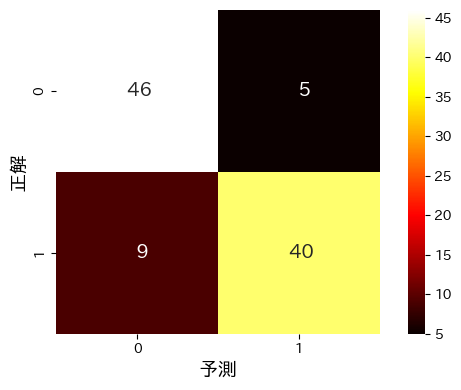

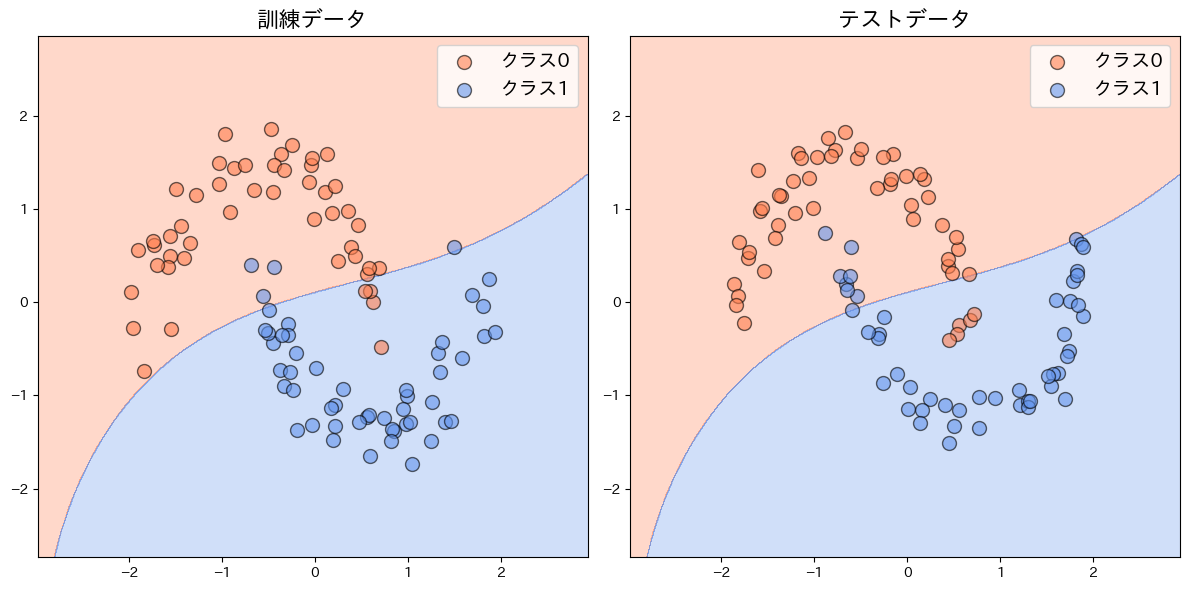

In [15]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 教師データの作成
x,y = make_moons(200,            # データ数
                 shuffle=True,   # シャッフル
                 noise=0.1,      # データの散らばり
                 random_state=0) # 乱数列の固定

# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    train_size=0.5,
                                                    shuffle=True,
                                                    random_state=0)
print('訓練データ数',len(x_train))
print('テストデータ数',len(x_test))


scaler=StandardScaler() # 標準化
# 訓練データで決めた平均と標準偏差を使い、訓練データを標準化
x_train=scaler.fit_transform(x_train)
# テストデータで決めた平均と標準偏差を使い、テストデータを標準化
x_test=scaler.transform(x_test)

# 訓練データとテストデータの分布を可視化
plot_data2d(x_train, y_train, x_test, y_test)

model=SVC(kernel='rbf', # 動径基底関数(RBF)カーネルを指定
          gamma=0.1,    # カーネル係数
          C=1)          # 正則化項

# 訓練データで学習
model.fit(x_train,y_train)

# 訓練データに対する予測
y_train_pred=model.predict(x_train)

print('訓練データ')
# 訓練データに対して、混同行列・正解率・精度・再現率・F1値を計算
evaluate(y_train, y_train_pred)

# テストデータに対する予測
y_test_pred=model.predict(x_test)
print('テストデータ')
# テストデータに対して、混同行列・正解率・精度・再現率・F1値を計算
evaluate(y_test, y_test_pred)

# 訓練データとテストデータの各クラスに属する領域の可視化
plot_decision_regions(x_train,y_train,x_test,y_test,model)

# 実習9.5：カーネルSVMによる2クラス分類 双月分布 大きな$\gamma$値

訓練データ数 100
テストデータ数 100


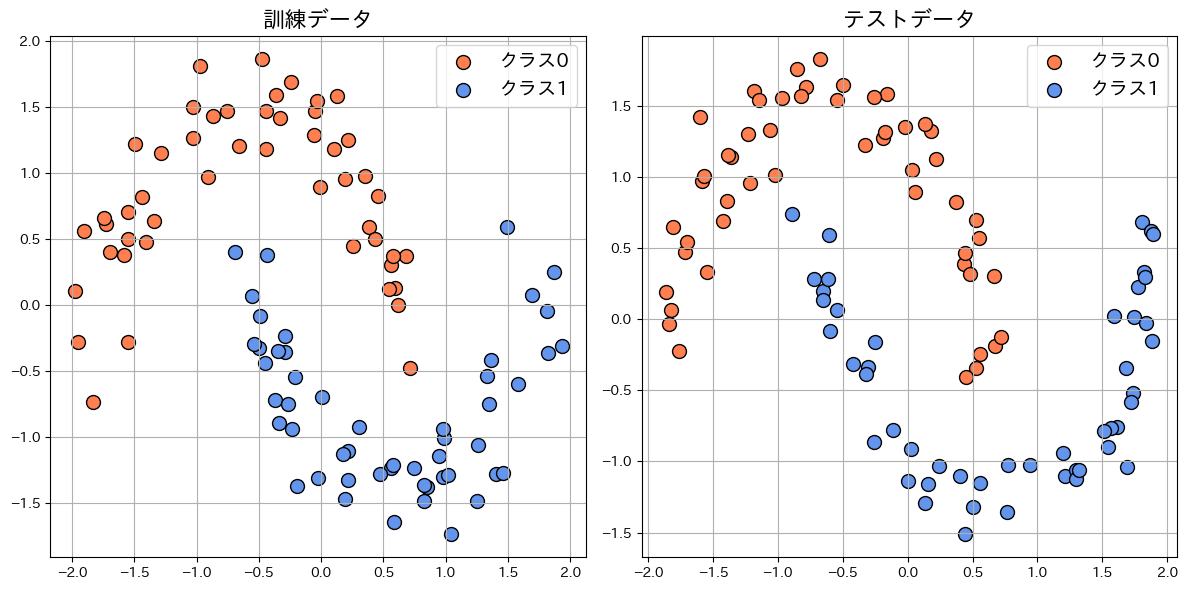

訓練データ
正解率
1.0

精度
   0    1
1.00 1.00

再現率
   0    1
1.00 1.00

F1値
   0    1
1.00 1.00


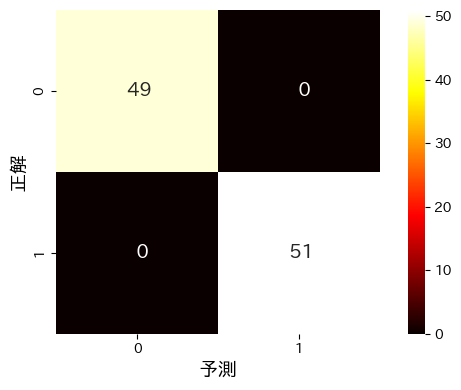

テストデータ
正解率
0.99

精度
   0    1
0.98 1.00

再現率
   0    1
1.00 0.98

F1値
   0    1
0.99 0.99


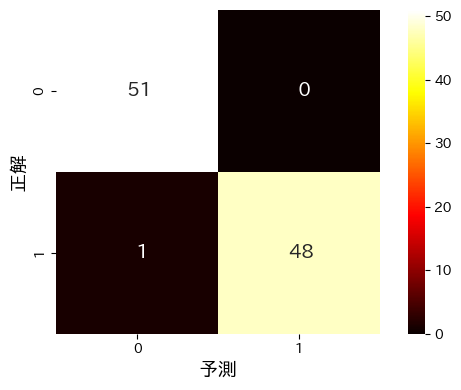

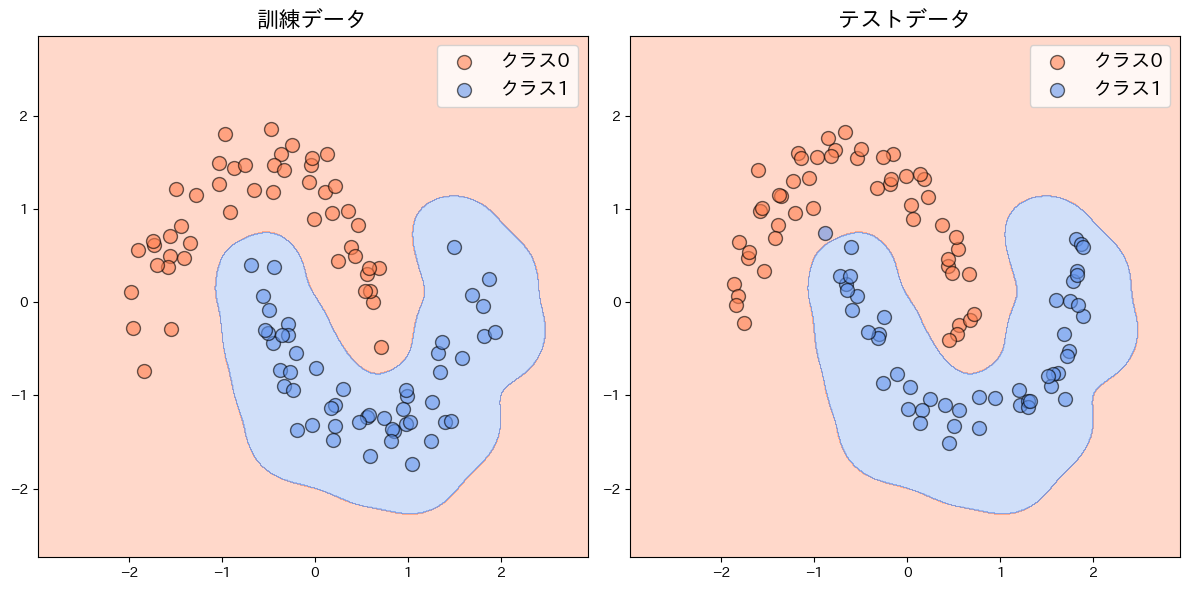

In [16]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 教師データの作成
x,y = make_moons(200,            # データ数
                 shuffle=True,   # シャッフル
                 noise=0.1,      # データの散らばり
                 random_state=0) # 乱数列の固定

# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    train_size=0.5,
                                                    shuffle=True,
                                                    random_state=0)
print('訓練データ数',len(x_train))
print('テストデータ数',len(x_test))

# 標準化
scaler=StandardScaler()
# 訓練データで決めた平均と標準偏差を使い、訓練データを標準化
x_train=scaler.fit_transform(x_train)
# テストデータで決めた平均と標準偏差を使い、テストデータを標準化
x_test=scaler.transform(x_test)

# 訓練データとテストデータの分布を可視化
plot_data2d(x_train, y_train, x_test, y_test)

model=SVC(kernel='rbf', # 動径基底関数(RBF)カーネルを指定
          gamma=10,    # カーネル係数
          C=1)          # 正則化項

# 訓練データで学習
model.fit(x_train,y_train)

# 訓練データに対する予測
y_train_pred=model.predict(x_train)

print('訓練データ')
# 訓練データに対して、混同行列・正解率・精度・再現率・F1値を計算
evaluate(y_train, y_train_pred)

# テストデータに対する予測
y_test_pred=model.predict(x_test)
print('テストデータ')
# テストデータに対して、混同行列・正解率・精度・再現率・F1値を計算
evaluate(y_test, y_test_pred)

# 訓練データとテストデータの各クラスに属する領域の可視化
plot_decision_regions(x_train,y_train,x_test,y_test,model)

# 実習9.6：ワインデータセットの多クラス分類 ハイパーパラメータのチューニング

説明変数の個数: 13
クラス数: 3
訓練データ数 124
テストデータ数 54
最良ハイパーパラメータ: {'C': 1, 'gamma': 0.01}
最良スコア: 0.9762820512820513
テストデータでの汎化能力
正解率
1.0

精度
   0    1    2
1.00 1.00 1.00

再現率
   0    1    2
1.00 1.00 1.00

F1値
   0    1    2
1.00 1.00 1.00


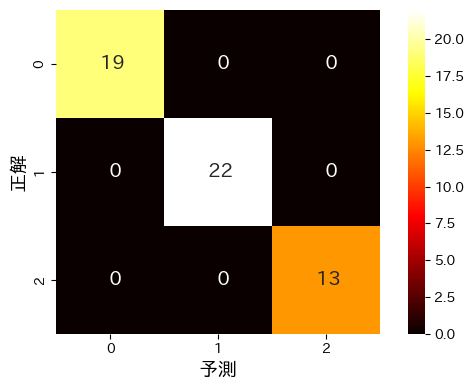

In [17]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# ワインデータの再読み込み
df = pd.read_csv('dm9-1.csv')

# 9.2で定義したpreprocess関数を使い、訓練データとテストデータに分割・標準化
x_train, x_test, y_train, y_test = preprocess(df,train_size=0.7,target_name='target')

params={
        'gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000], # カーネル係数の候補
        'C':[0.001, 0.01, 0.1, 1, 2, 4, 8, 16], # 正則化項
       }

model=SVC(kernel='rbf') # 動径カーネルサポートベクトルマシン

# 分割数(n_splits)=10のK分割交差検証
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)
# 最良ハイパーパラメータを決める際の指標
# average='weighted': 全クラスで平均する際に各クラスのデータ量で重み付け
scorer=sklearn.metrics.make_scorer(sklearn.metrics.f1_score,
                                   average='weighted')

# 分類器の最良ハイパーパラメータをグリッドサーチで求める
grid_cv=GridSearchCV(estimator=model, # 分類器
                     param_grid=params, # 試行するハイパーパラメータの候補
                     scoring=scorer, # 最良ハイパーパラメータを決める際の指標
                     cv=k_fold) # 交差検証方法

# 訓練データを使い、最良ハイパーパラメータを決定
grid_cv.fit(x_train,y_train)

# 最良ハイパーパラメータとスコアを変数grid_cvの属性から取得
print('最良ハイパーパラメータ:', grid_cv.best_params_)
print('最良スコア:', grid_cv.best_score_)

print('テストデータでの汎化能力')
y_test_pred=grid_cv.predict(x_test) # テストデータに対する予測
evaluate(y_test, y_test_pred)

# 実習9.7：水の飲用可能性予測

***DMCODE 1700705460.034751
説明変数の個数: 9
クラス数: 2
訓練データ数 1407
テストデータ数 604
最良ハイパーパラメータ: {'C': 4, 'gamma': 0.1}
最良スコア: 0.6694941654291753
テストデータでの汎化能力
正解率
0.7052980132450332

精度
   0    1
0.71 0.68

再現率
   0    1
0.86 0.46

F1値
   0    1
0.78 0.55


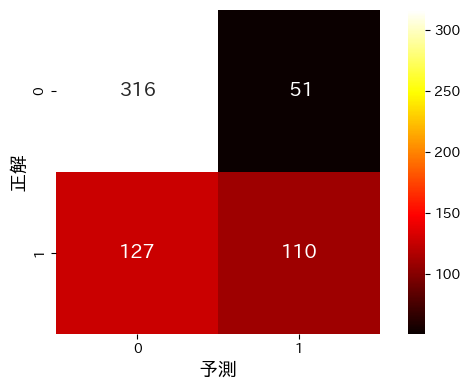

In [19]:
import random
import numpy as np
random.seed(2023)
np.random.seed(2023)
dmcode()

# 以降に必要なインポート文やコードを記述すること

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

df = pd.read_csv('dm9-2.csv', encoding='utf-8')

# 9.2で定義したpreprocess関数を使い、訓練データとテストデータに分割・標準化
x_train, x_test, y_train, y_test = preprocess(df,train_size=0.7,target_name='飲用可能性')

params={
        'gamma':[0.001, 0.01, 0.1, 0.2, 0.4, 1], # カーネル係数の候補
        'C':[0.1, 0.2, 0.4, 1, 2, 4, 8],         # 正則化項
       }

model=SVC(kernel='rbf') # 動径カーネルサポートベクトルマシン

# 分割数(n_splits)=5のK分割交差検証
k_fold=KFold(n_splits=5, shuffle=True, random_state=0)
# 最良ハイパーパラメータを決める際の指標
# average='weighted': 全クラスで平均する際に各クラスのデータ量で重み付け
scorer=sklearn.metrics.make_scorer(sklearn.metrics.f1_score,
                                   average='weighted')

# 分類器の最良ハイパーパラメータをグリッドサーチで求める
grid_cv=GridSearchCV(estimator=model, # 分類器
                     param_grid=params, # 試行するハイパーパラメータの候補
                     scoring=scorer, # 最良ハイパーパラメータを決める際の指標
                     cv=k_fold) # 交差検証方法

# 訓練データを使い、最良ハイパーパラメータを決定
grid_cv.fit(x_train,y_train)

# 最良ハイパーパラメータとスコアを変数grid_cvの属性から取得
print('最良ハイパーパラメータ:', grid_cv.best_params_)
print('最良スコア:', grid_cv.best_score_)

print('テストデータでの汎化能力')
y_test_pred=grid_cv.predict(x_test) # テストデータに対する予測
evaluate(y_test, y_test_pred)